In [73]:
import pandas as pd
import seaborn as sns
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt

In [8]:
df = pd.read_excel(r'./data/Solar.xlsx')
df

,martwe_1993_2003,martwe_2004_2013,martwe_2014,martwe_2015,martwe_2016,martwe_2017,martwe_2018,martwe_2019,martwe_2020,martwe_2021,...,zywe_2012,zywe_2013,zywe_2014,zywe_2015,zywe_2016,zywe_2017,zywe_2018,zywe_2019,zywe_2020,zywe_2021
0,1034080.0,1079190.0,930067.0,908722.0,893336.0,976202.0,891569.0,1197670.0,833079.0,858394.0,...,536007.0,536007.0,1286060.0,414619.0,1286060.0,1286060.0,1286060.0,886135.0,892386.0,892386.0
1,944520.0,1014020.0,834285.0,1067380.0,1002940.0,1208100.0,1076740.0,1091500.0,895534.0,754292.0,...,550980.0,550980.0,1276510.0,476758.0,1276510.0,1276510.0,1276360.0,892386.0,1021240.0,1021240.0
2,727372.0,937530.0,1074960.0,550980.0,966147.0,957529.0,887154.0,1146190.0,797180.0,1016430.0,...,563352.0,563352.0,1276360.0,482097.0,1276360.0,1276360.0,1276360.0,1021240.0,884581.0,884581.0
3,879249.0,508024.0,781008.0,1018770.0,1040430.0,873253.0,859849.0,1134260.0,1007030.0,1009570.0,...,587986.0,587986.0,1276040.0,490880.0,1276040.0,1276040.0,1276040.0,884581.0,805006.0,805006.0
4,849725.0,763135.0,1054120.0,987465.0,1031440.0,1140150.0,954810.0,1089420.0,1199450.0,887906.0,...,600155.0,600155.0,1272800.0,520981.0,1272800.0,1272800.0,1272800.0,805006.0,764919.0,764919.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.columns.values

array(['martwe_1993_2003', 'martwe_2004_2013', 'martwe_2014',
       'martwe_2015', 'martwe_2016', 'martwe_2017', 'martwe_2018',
       'martwe_2019', 'martwe_2020', 'martwe_2021', 'zywe_1992',
       'zywe_2003', 'zywe_2012', 'zywe_2013', 'zywe_2014', 'zywe_2015',
       'zywe_2016', 'zywe_2017', 'zywe_2018', 'zywe_2019', 'zywe_2020',
       'zywe_2021'], dtype=object)

# 1993-2003

In [68]:
martwe_1993_2003 = pd.DataFrame(df['martwe_1993_2003']).dropna()
zywe_2003 = pd.DataFrame(df['zywe_2003']).dropna()

d_1993_2003 = pd.concat([martwe_1993_2003, zywe_2003], axis = 1)

In [69]:
d_1993_2003

,martwe_1993_2003,zywe_2003
0,1034080.0,600155.0
1,944520.0,601858.0
2,727372.0,617324.0
3,879249.0,629488.0
4,849725.0,649323.0
...,...,...
3401,NaN,926104.0
3402,NaN,936647.0
3403,NaN,796467.0
3404,NaN,991115.0


<Axes: >

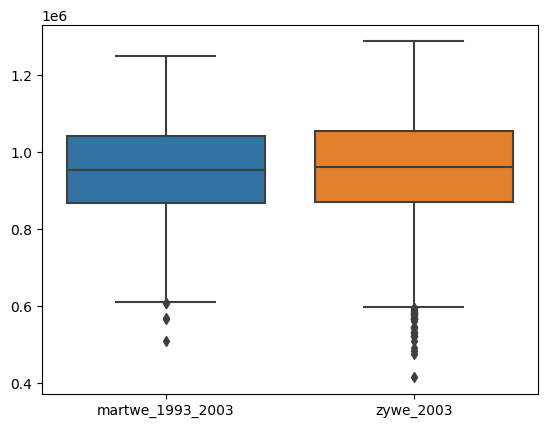

In [74]:
sns.boxplot(data=d_1993_2003)

<Axes: ylabel='Count'>

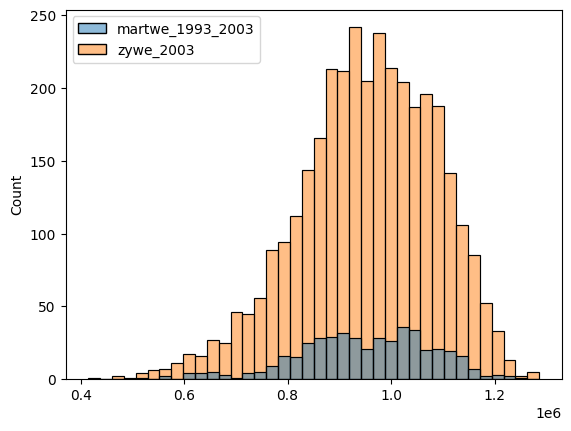

In [75]:
sns.histplot(data=d_1993_2003)

In [78]:
ks_2samp(d_1993_2003['zywe_2003'], d_1993_2003['martwe_1993_2003'])

KstestResult(statistic=0.868761009982384, pvalue=0.0)

# 2004-2013

In [79]:
martwe_2004_2013 = pd.DataFrame(df['martwe_2004_2013']).dropna()
zywe_2013 = pd.DataFrame(df['zywe_2013']).dropna()

d_2004_2013 = pd.concat([martwe_2004_2013, zywe_2013], axis = 1)

In [80]:
d_2004_2013

,martwe_2004_2013,zywe_2013
0,1079190.0,536007.0
1,1014020.0,550980.0
2,937530.0,563352.0
3,508024.0,587986.0
4,763135.0,600155.0
...,...,...
2762,NaN,926104.0
2763,NaN,936647.0
2764,NaN,796467.0
2765,NaN,991115.0


<Axes: >

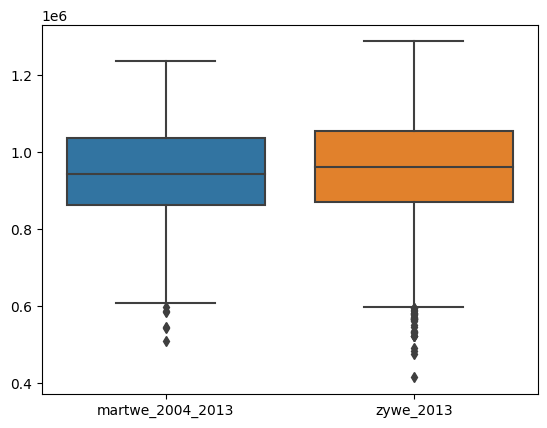

In [81]:
sns.boxplot(data=d_2004_2013)

<Axes: ylabel='Count'>

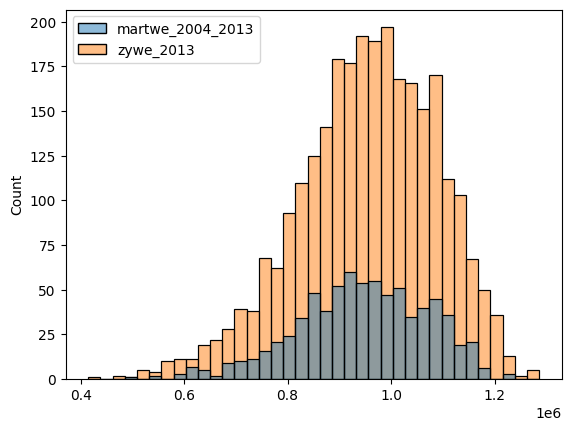

In [82]:
sns.histplot(data=d_2004_2013)

In [84]:
ks_2samp(d_2004_2013['zywe_2013'], d_2004_2013['martwe_2004_2013'])

KstestResult(statistic=0.7271413082761113, pvalue=0.0)

# 2014-2018

In [129]:
martwe_2014_2018 = pd.melt(pd.DataFrame(pd.concat([
    df['martwe_2014'], 
    df['martwe_2015'], 
    df['martwe_2016'], 
    df['martwe_2017'], 
    df['martwe_2018']], axis = 1))).dropna()

martwe_2014_2018 = pd.DataFrame({
    'martwe_2014_2018': martwe_2014_2018['value']
}).reset_index(drop = True)

d_2014_2018 = pd.concat([martwe_2014_2018, df['zywe_2018'].dropna()], axis = 1)

In [130]:
d_2014_2018

,martwe_2014_2018,zywe_2018
0,930067.0,1286060.0
1,834285.0,1276360.0
2,1074960.0,1276360.0
3,781008.0,1276040.0
4,1054120.0,1272800.0
...,...,...
2288,NaN,520981.0
2289,NaN,490880.0
2290,NaN,482097.0
2291,NaN,476758.0


<Axes: >

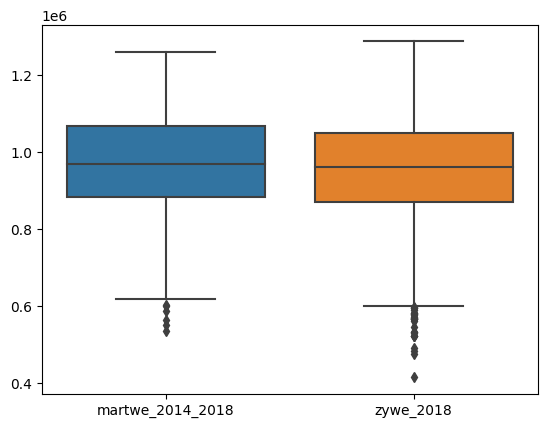

In [131]:
sns.boxplot(data=d_2014_2018)

<Axes: ylabel='Count'>

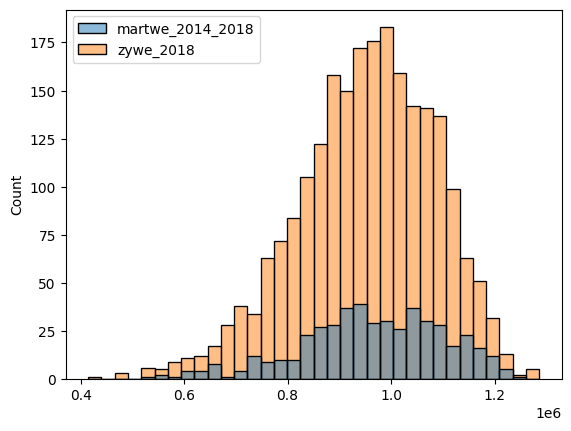

In [132]:
sns.histplot(data=d_2014_2018)

In [186]:
ks_2samp(d_2014_2018['zywe_2018'], d_2014_2018['martwe_2014_2018'])

KstestResult(statistic=0.7932839075447012, pvalue=0.0)

# 2019-2021

In [181]:
martwe_2019_2021 = pd.melt(pd.DataFrame(pd.concat([
    df['martwe_2019'], 
    df['martwe_2020'], 
    df['martwe_2021']], axis = 1))).dropna()

martwe_2019_2021 = pd.DataFrame({
    'martwe_2019_2021': martwe_2019_2021['value']
}).reset_index(drop = True)

zywe_2021 = df['zywe_2021'].dropna().sort_values().iloc[6:]

d_2019_2021 = pd.concat([martwe_2019_2021, zywe_2021], axis = 1).reset_index(drop = True)

In [182]:
d_2019_2021

,martwe_2019_2021,zywe_2021
0,1197670.0,892386.0
1,1091500.0,1021240.0
2,1146190.0,884581.0
3,1134260.0,805006.0
4,1089420.0,764919.0
...,...,...
2211,NaN,1272800.0
2212,NaN,1276040.0
2213,NaN,1276360.0
2214,NaN,1276360.0


<Axes: >

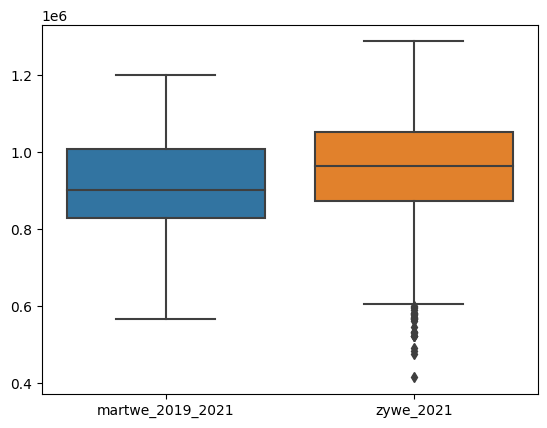

In [183]:
sns.boxplot(data=d_2019_2021)

<Axes: ylabel='Count'>

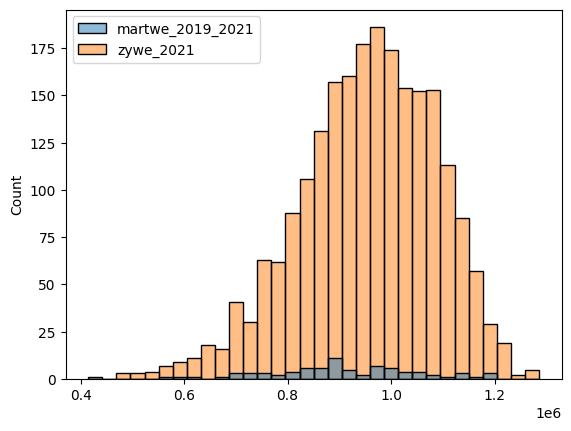

In [184]:
sns.histplot(data=d_2019_2021)

In [185]:
ks_2samp(d_2019_2021['zywe_2021'], d_2019_2021['martwe_2019_2021'])

KstestResult(statistic=0.9638989169675091, pvalue=0.0)